<a href="https://colab.research.google.com/github/darkwingpatil/Ml_hackethons/blob/main/Keras_Video_Processing_VGGNet_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint


## Learning Objective

At the end of the experiment, you will be able to :

* calculate the screen time of a character from a given video using deep learning

In [ ]:
#@title Experiment Walkthrough Video

from IPython.display import HTML

HTML("""<video width="800" height="400" controls>
  <source src="https://cdn.talentsprint.com/talentsprint1/archives/sc/aiml/keras_video_processing_screen_time.mp4" type="video/mp4">
</video>
""")

## Dataset

### History

The screen time of an actor/character in a movie or an episode is very important. Many actors get paid according to their total screen time. Moreover, we also want to know how much time our favorite character acted on screen. So, have you ever wondered how can you calculate the total screen time of an actor? One of the best ways is by using deep learning.

### Description

We will use a video clip of **`Tom and Jerry`** cartoon series and the model shall be trained on a video. The downloaded data is in the form of a video, which is nothing but a collection of a set of images. These images are called frames and can be combined to get the original video. So, a problem related to video data is not that different from an image classification or an object detection problem. There is just one extra step of extracting frames from the video.

The Model will be evaluated (tested) on another video of **`Tom and Jerry`**

### Setup Steps:

In [1]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2304145" #@param {type:"string"}

In [2]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "7892449987" #@param {type:"string"}

In [3]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython
import re
ipython = get_ipython()

notebook= "U4W20_73_Keras_Video_Processing_Screen_Time_A" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch")
    from IPython.display import HTML, display
    ipython.magic("sx wget -qq https://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/Video_Processing/Train_data.zip")
    ipython.magic("sx unzip --q Train_data.zip")
    ipython.magic("sx wget -qq https://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/Video_Processing/Test_data.zip")
    ipython.magic("sx unzip --q Test_data.zip")
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")

    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:
        print(r["err"])
        return None
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getWalkthrough() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional,
              "concepts" : Concepts, "record_id" : submission_id,
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook, "feedback_walkthrough":Walkthrough ,
              "feedback_experiments_input" : Comments,
              "feedback_inclass_mentor": Mentor_support}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:
        print(r["err"])
        return None
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://aiml-iiith.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id


def getAdditional():
  try:
    if not Additional:
      raise NameError
    else:
      return Additional
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None

def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None


def getWalkthrough():
  try:
    if not Walkthrough:
      raise NameError
    else:
      return Walkthrough
  except NameError:
    print ("Please answer Walkthrough Question")
    return None

def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None


def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError
    else:
      return Answer
  except NameError:
    print ("Please answer Question")
    return None


def getId():
  try:
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


### Importing required packages

In [4]:
import os
import cv2
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential, Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from sklearn.model_selection import train_test_split
from keras.layers import Dense, InputLayer, Dropout, Flatten

### Loading the video

In [ ]:
train_videoFile = "/content/Video_Processing/Tom_and_jerry_train.mp4"

# Create a directory to store all the frames
all_images = "/content/all_images"
os.mkdir(all_images)

### Read the video, extract frames from it and save them as images

For this task, use OpenCV as shown below and extract frames for every second

In [6]:
def getVideoFrames(videopath, imagespath):

  # YOUR CODE HERE: To capture the video from the given path using cv2.VideoCapture()

  cap = cv2.VideoCapture(videopath)

  # Frame rate of the video
  # How many frames per video you want to capture
  frameRate = cap.get(5)
  i = 0

  while True:
      # Current frame number
      # Capturing one frame per second
      frameId = cap.get(1)

      # Read frame by frame
      ret, frame = cap.read()

      if ret == False:
          break

      # Extract one frame for each second
      if (frameId % math.floor(frameRate) == 0):

          # Save each frame using cv2.imwrite()
          cv2.imwrite(imagespath+'/frame'+str(i)+'.jpg',frame)
          i+=1

  # After loop release the VideoCapture and destroy all windows
  cap.release()
  cv2.destroyAllWindows()
  return "Successfully extracted the images!!"

In [7]:
getVideoFrames("/content/Train_data/Tom_and_jerry_train.mp4", all_images)

'Successfully extracted the images!!'

### Let us visualize an image (frame)

We will first read the image using the imread() function of matplotlib, and then plot it using the imshow() function.

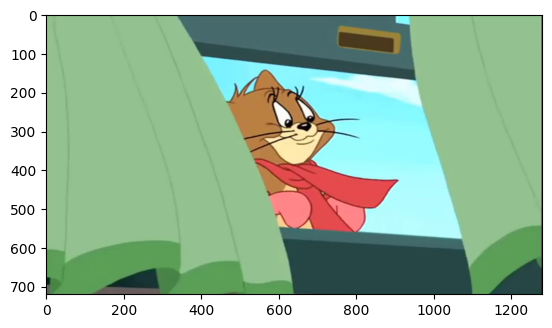

In [8]:
img = plt.imread('/content/all_images/frame0.jpg')   # Reading the image by its name
plt.imshow(img)

Since the duration of the video is 4:58 minutes (298 seconds), we now have 298 images in total.

In this problem, there are three classes as mentioned below and hence it is a multi-class classification problem



```
0 – The frame has neither JERRY nor TOM
1 – JERRY is in the frame
2 – TOM is in the frame
```

The `train_labels.csv` contains the respective labels for each extracted frame.


### Label images for training the model

In [9]:
train_labels = '/content/Train_data/train_labels.csv'

In [10]:
df_train = pd.read_csv(train_labels)


In [11]:
df_train.head()

,Image_ID,Class
0,frame0.jpg,1
1,frame1.jpg,1
2,frame2.jpg,2
3,frame3.jpg,2
4,frame4.jpg,2


In [12]:
classes = df_train['Class'].unique().astype('str')
print("Classes:", classes)

df_train['Image_ID'] = df_train['Image_ID'].apply(lambda x: all_images+'/'+x)

labels = {0:'None', 1: 'Jerry', 2: 'Tom'}
df_train['Labels'] = [labels[each] for each in df_train['Class']]

df_train.head()

Classes: ['1' '2' '0']


,Image_ID,Class,Labels
0,/content/all_images/frame0.jpg,1,Jerry
1,/content/all_images/frame1.jpg,1,Jerry
2,/content/all_images/frame2.jpg,2,Tom
3,/content/all_images/frame3.jpg,2,Tom
4,/content/all_images/frame4.jpg,2,Tom


### Visualize few Images

In [13]:
eachClass = df_train.groupby('Class').first()
eachClass

,Image_ID,Labels
Class,,
0,/content/all_images/frame11.jpg,None
1,/content/all_images/frame0.jpg,Jerry
2,/content/all_images/frame2.jpg,Tom


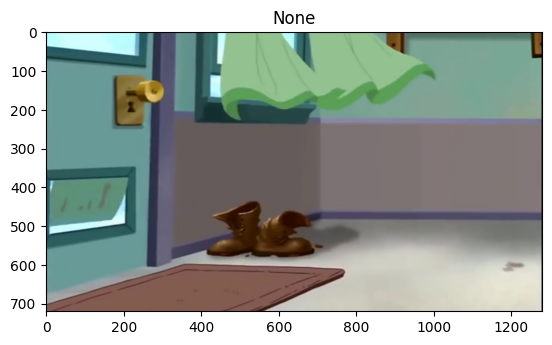

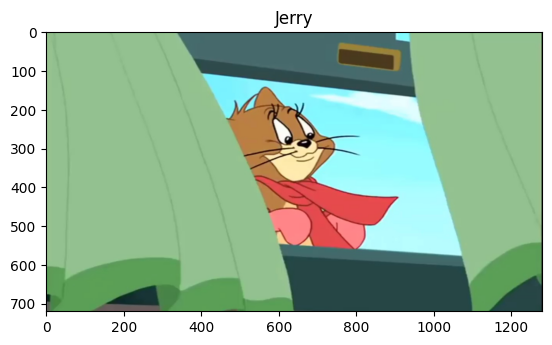

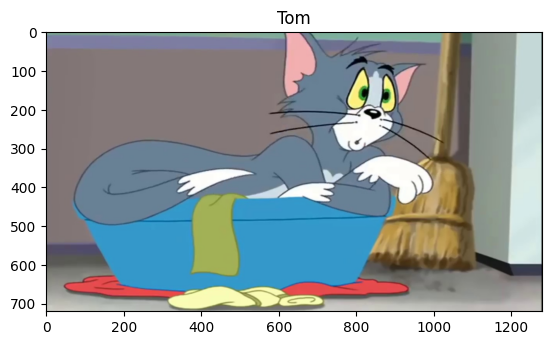

In [14]:
for index, row in eachClass.iterrows():
  try:
    img = plt.imread(row['Image_ID'])   # Reading the image by its name
    plt.title(row['Labels'])
    plt.imshow(img)
    plt.show()
  except FileNotFoundError :
    continue

### Input Data and Preprocessing

To prepare this extracted images data as input to our neural network, the  below mentioned preprocessing steps are to be followed:

* Read all images one by one
* Resize each image to (224, 224, 3) for the input to the model

In [18]:
#  Solution to read image
def resizeFeatures(image_filenames):
  res_img = []
  for each_img in image_filenames:
    img = plt.imread(each_img)
    print(img.shape) #init shape -> (720,1280,3)
    resized_img = cv2.resize(img, (224,224)).astype(int)
    res_img.append(resized_img)

  features = np.array(res_img)
  return features

In [16]:
#Alternative to read image
# from PIL import Image

# def resizeFeatures(image_filenames):
#     res_img = []
#     for each_img in image_filenames:
#         img = Image.open(each_img)  # Correct way to open an image using PIL
#         img = np.array(img)  # Convert the PIL image to a numpy array
#         print(img.shape)  # Initial shape -> (720, 1280, 3)
#         resized_img = cv2.resize(img, (224, 224)).astype(int)  # Resizes the image
#         res_img.append(resized_img)

#     features = np.array(res_img)
#     return features

In [17]:
features = resizeFeatures(df_train['Image_ID'])
features.shape

(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280

(298, 224, 224, 3)

Since there are three classes, we will one hot encode them using the `to_categorical()` function of `keras.utils`

In [19]:
from tensorflow.keras.utils import to_categorical


y = df_train["Class"]

# YOUR CODE HERE: To one hot encode the classes
one_hot_y = to_categorical(y)

## Transfer Learning

Since we have only 298 images, so it will be difficult to train a neural network with this little dataset. Here comes the concept of transfer learning.

With the help of transfer learning, we can use features generated by a model trained on a large dataset into our model. Here we will use the VGG16 model trained on the “imagenet” dataset. For this, we are using TensorFlow high-level API Keras. With Keras, you can directly import the VGG16 model as shown in the code below.

In [20]:
# YOUR CODE HERE: To load the pretrained VGG16 model and specify include_top=False to remove the top layer

model = VGG16(include_top=False)

VGG16 model trained with imagenet dataset predicts on lots of classes, but in this problem, we are only having three classes, either `"Tom" or "Jerry" or "None"`.

That’s why above we are using `include_top = False`, which signifies that we are not including fully connected layers from the VGG16 model.

Before passing any input to the model, it is important to preprocess it as per the model’s requirement. Use the `preprocess_input()` function of `keras.applications.vgg16` to perform this step.

In [21]:
# YOUR CODE HERE: To preprocess the input data
process_feature= preprocess_input(features)

Generate a validation set using the  `train_test_split()` function of the sklearn to check the performance of the model on unseen images.

In [22]:
# YOUR CODE HERE: To split the data in to train and the validation set
X_train, X_valid, y_train, y_valid= train_test_split(process_feature,one_hot_y,test_size=0.2, random_state=42)

print("Training Features:", X_train.shape)
print("Training Labels:", y_train.shape)
print("Validation Features:", X_valid.shape)
print("Validation Labels:", y_valid.shape)

Training Features: (238, 224, 224, 3)
Training Labels: (238, 3)
Validation Features: (60, 224, 224, 3)
Validation Labels: (60, 3)


Pass the above extracted `X_train and X_valid` features as **input to the pre-trained `vgg_model`** and get the predicted data and then use those features to retrain the model.

In [23]:
X_train_predicted =  model.predict(X_train)
# YOUR CODE HERE: To get the predictions on the train data using VGG model
X_valid_predicted =  model.predict(X_valid)
# YOUR CODE HERE: To get the predictions on the validation data using VGG model

print("Training Features:", X_train_predicted.shape)
print("Validation Features:", X_valid_predicted.shape)
#  shape of inputs coming out of convolution networks is (7,7,512)
#  when then needs to be feed to Fully connected networks

8/8 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
Training Features: (238, 7, 7, 512)
Validation Features: (60, 7, 7, 512)


### VGG16
![picture](https://miro.medium.com/max/788/1*_Lg1i7wv1pLpzp2F4MLrvw.png)

Notice that the output features from VGG16 model will be having shape `7*7*512`

Since we are not including fully connected layers from the VGG16 model, we need to create a model with some fully connected layers and an output layer with 3 classes, either `"Tom" or "Jerry" or "None"`.

In order to pass the above extracted `X_train and X_valid` features to our neural network, we have to reshape it to 1-D, which will be an input shape for our model.

In [24]:
# Converting to 1-D
X_train_reshaped = X_train_predicted.reshape(238, 7*7*512)
X_valid_reshaped = X_valid_predicted.reshape(60, 7*7*512)

print("Training Features:", X_train_reshaped.shape)
print("Validation Features:", X_valid_reshaped.shape)

Training Features: (238, 25088)
Validation Features: (60, 25088)


Now, preprocess the images and normalize by dividing the vector with it's maximum value, which helps the model to converge faster.

In [25]:
# Normalize the data
X_train_centered = X_train_reshaped/X_train_reshaped.max()
X_valid_centered = X_valid_reshaped/X_train_reshaped.max()

print("Training Features:", X_train_centered.shape)
print("Validation Features:", X_valid_centered.shape)

Training Features: (238, 25088)
Validation Features: (60, 25088)


### Building the model

In [26]:
# YOUR CODE HERE: To create an object for the sequential model
nModel = Sequential()

# YOUR CODE HERE: To add the Input layer to the model with size 7*7*512

# nModel.add(Flatten(input_shape=(7,7,512)))
nModel.add(InputLayer(shape=(7*7*512,)))
nModel.add(Dense(1024, activation='sigmoid')) # Hidden layer

 # YOUR CODE HERE: To add the Dropout layer
nModel.add(Dropout(0.5))
nModel.add(Dense(512, activation='sigmoid')) # Hidden layer

nModel.add(Dropout(0.5)) # Dropout layer

nModel.add(Dense(256, activation='sigmoid')) # Hidden layer

nModel.add(Dropout(0.5)) # Dropout layer

# YOUR CODE HERE: To add the Output layer
nModel.add(Dense(3, activation='softmax'))

In [34]:
# combined_model= Model(inputs=model.input, outputs= nModel(model.output))

In [35]:
# combined_model.summary()

Model: "functional_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, None, None, 3)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, None, None, 64)      │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, None, None, 64)      │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, None, None, 64)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, None, None, 128)     │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, None, None, 128)     │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, None, None, 128)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, None, None, 256)     │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, None, None, 256)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, None, None, 512)     │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, None, None, 512)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, None, None, 512)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_3 (Sequential)            │ (None, 3)                   │      26,348,035 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 41,062,723 (156.64 MB)

 Trainable params: 41,062,723 (156.64 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
nModel.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1024)                │      25,691,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             771 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,348,035 (100.51 MB)

 Trainable params: 26,348,035 (100.51 MB)

 Non-trainable params: 0 (0.00 B)

### Compiling the model

In [36]:
# YOUR CODE HERE: To compile the model
# combined_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
nModel.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Training the model

In [37]:
# YOUR CODE HERE: To fit the model
# combined_model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 78s 4s/step - accuracy: 0.3917 - loss: 1.3853 - val_accuracy: 0.2000 - val_loss: 1.1522
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 459ms/step - accuracy: 0.3509 - loss: 1.2871 - val_accuracy: 0.3667 - val_loss: 1.1293
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 470ms/step - accuracy: 0.4096 - loss: 1.1775 - val_accuracy: 0.4333 - val_loss: 1.0633
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 467ms/step - accuracy: 0.3390 - loss: 1.2709 - val_accuracy: 0.3667 - val_loss: 1.0559
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 468ms/step - accuracy: 0.2895 - loss: 1.2877 - val_accuracy: 0.3667 - val_loss: 1.0592
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 473ms/step - accuracy: 0.3559 - loss: 1.2089 - val_accuracy: 0.3667 - val_loss: 1.0524
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 476ms/step - accuracy: 0.3567 - loss: 1.1181 - val_accuracy: 0.3667 - val_loss: 1.0718
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 483ms/step - accuracy: 0.3777 - loss: 1.1270 - val_accuracy: 0.3667 - val_loss: 

In [29]:
history = nModel.fit(X_train_centered, y_train, epochs=100, validation_data=(X_valid_centered, y_valid))

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 794ms/step - accuracy: 0.3853 - loss: 1.2785 - val_accuracy: 0.3667 - val_loss: 1.1020
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3319 - loss: 1.2267 - val_accuracy: 0.5333 - val_loss: 0.9962
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3998 - loss: 1.1472 - val_accuracy: 0.5000 - val_loss: 0.9811
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3933 - loss: 1.1042 - val_accuracy: 0.6333 - val_loss: 0.8944
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4863 - loss: 1.0251 - val_accuracy: 0.7333 - val_loss: 0.7843
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6711 - loss: 0.7577 - val_accuracy: 0.7833 - val_loss: 0.6642
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7567 - loss: 0.6886 - val_accuracy: 0.8500 - val_loss: 0.4941
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8440 - loss: 0.4288 - val_accuracy: 0.8833 - val_loss

### Evaluate the model

Calculating the screen time on Test Data

In [30]:
# Create a directory to store all the frames
test_images = "test_images"
os.mkdir(test_images)

FileExistsError: [Errno 17] File exists: 'test_images'

In [31]:
getVideoFrames("/content/Test_data/Tom_and_Jerry_test.mp4", test_images)

'Successfully extracted the images!!'

### Load the Test Data

Iterate over the **`Test Images`** directory to extract all the test Id's

In [32]:
def getIDs(directory):
  ids = []
  for filename in os.listdir(directory):
      if filename.endswith(".jpg"):
          ids.append(os.path.join(directory, filename))
      else:
          continue
  return ids

In [33]:
test_ids = getIDs(test_images)
len(test_ids)

186

Since the duration of the video is 3:1 minutes (186 seconds), we now have 186 images in total.


### Input Data and Preprocessing

In [34]:
test_features = resizeFeatures(test_ids)

(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280

In [35]:
# YOUR CODE HERE: To preprocess the images
pre_processed_test_feat = preprocess_input(test_features)

# YOUR CODE HERE: To extract features from the images using pretrained model
test_features = model.predict(pre_processed_test_feat)
# YOUR CODE HERE: To convert the images to 1-D form
test_reshaped = test_features.reshape(186, 7*7*512)

# YOUR CODE HERE: To Normalize the images
test_centered = test_reshaped/test_reshaped.max()

6/6 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step


### Make predictions on the test images

In [36]:
pred = nModel.predict(test_centered)
predictions =np.argmax(pred,axis=1)

print("The screen time of JERRY is", predictions[predictions==1].shape[0], "seconds")
print("The screen time of TOM is", predictions[predictions==2].shape[0], "seconds")
print("The screen time of Neither JERRY nor TOM is", predictions[predictions==0].shape[0], "seconds")

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step
The screen time of JERRY is 3 seconds
The screen time of TOM is 95 seconds
The screen time of Neither JERRY nor TOM is 88 seconds


### Please answer the questions below to complete the experiment:




In [37]:
#@title State True or False: In VGG16 model, the parameter 'include_top = False' specifies to include the fully-connected layer at the top of the network { run: "auto", form-width: "500px", display-mode: "form" }
Answer = "FALSE" #@param ["","TRUE", "FALSE"]


In [38]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good and Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [39]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "na" #@param {type:"string"}


In [40]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [41]:
#@title  Experiment walkthrough video? { run: "auto", vertical-output: true, display-mode: "form" }
Walkthrough = "Didn't use" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [42]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Somewhat Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [43]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "Didn't use" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [44]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 9074
Date of submission:  31 Oct 2024
Time of submission:  13:12:18
View your submissions: https://aiml-iiith.talentsprint.com/notebook_submissions
